## Binary Images

In [1]:
# if using notebook:
# %matplotlib notebook
# if using jupyterlab:
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import platform
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['image.cmap'] = "gray"
print ("OpenCV version: ", cv2.__version__)
print ("Matplotlib version: ", matplotlib.__version__)
print ("Python version: ", platform.python_version())

OpenCV version:  4.2.0
Matplotlib version:  3.3.1
Python version:  3.8.5


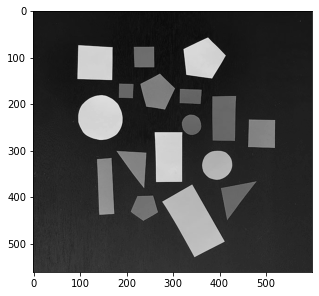

In [2]:
# Loading a sample image
img1 = cv2.imread('sample_images/shapes_and_colors.jpg', cv2.IMREAD_GRAYSCALE)
fig = plt.figure()
fig.set_size_inches(5, 5)
plt.imshow(img1);

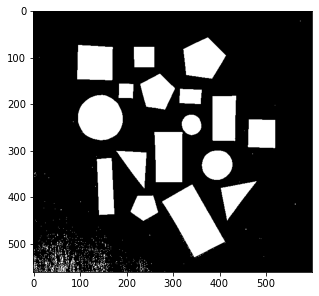

In [3]:
# convert grayscale image to a binary image
ret, img1_binary = cv2.threshold(img1,55,255,cv2.THRESH_BINARY)
fig = plt.figure(figsize=(5, 5))
plt.imshow(img1_binary);

In [4]:
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
from matplotlib.widgets import Slider

0

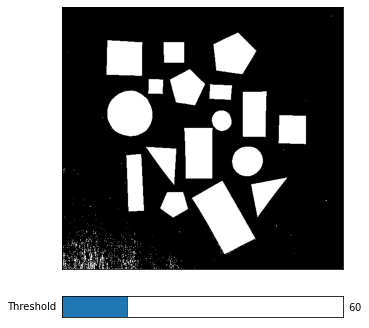

In [5]:
# Or we can use interactive widgets of JN to see the effect of various thresholds
fig = plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.25, bottom=0.25)
aximage = plt.imshow(img1_binary);
aximage._axes.set_xticks([]);
aximage._axes.set_yticks([]);
axthresh = plt.axes([0.25, 0.15, 0.65, 0.05])
slider_thresh = Slider(axthresh, 'Threshold', 1, 255, valinit=60, valstep=1)

def updateFigure(val):
    thresh = slider_thresh.val
    ret, img1_binary = cv2.threshold(img1,thresh,255,cv2.THRESH_BINARY)
    aximage.set_data(img1_binary)

slider_thresh.on_changed(updateFigure)

## Morphological Operations

### Erosion

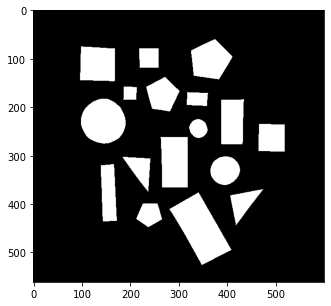

In [6]:
strel = np.ones((5,5),np.uint8)
img1_eroded = cv2.erode(img1_binary, strel,iterations = 1)
fig = plt.figure()
plt.imshow(img1_eroded);

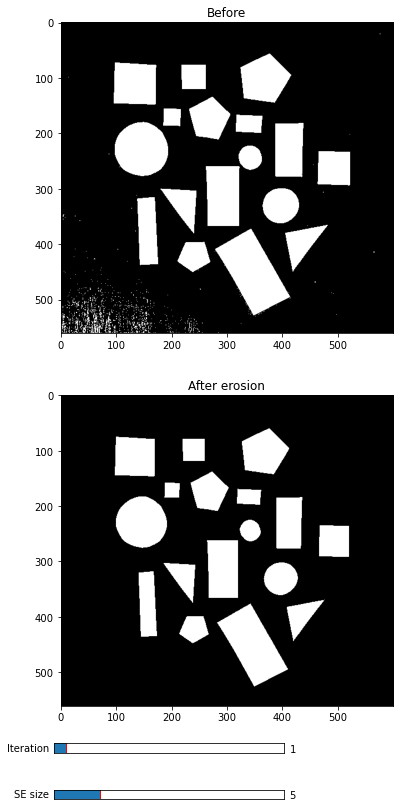

In [7]:
strel = np.ones((5,5),np.uint8)
img1_eroded = cv2.erode(img1_binary, strel, iterations = 1)

fig = plt.figure(figsize=(8, 13))
plt.subplots_adjust(left=0.0, bottom=0.15)

a=fig.add_subplot(2,1,1)
plt.imshow(img1_binary)
a.set_title('Before')

a=fig.add_subplot(2,1,2)
axeroded = plt.imshow(img1_eroded)
a.set_title('After erosion')

axiter = plt.axes([0.15, 0.1, 0.40, 0.01])
slider_iter = Slider(axiter, 'Iteration', 0, 20, valinit=1, valstep=1)

axstrel = plt.axes([0.15, 0.05, 0.40, 0.01])
slider_strel = Slider(axstrel, 'SE size', 1, 21, valinit=5, valstep=2)

def updateErosionFigure(val):
    itr = slider_iter.val
    strel_size = int(slider_strel.val)
    strel = np.ones((strel_size, strel_size),np.uint8)
    img1_eroded = cv2.erode(img1_binary, strel, iterations = int(itr))
    axeroded.set_data(img1_eroded)
    # redraw canvas while idle
    fig.canvas.draw_idle()

slider_iter.on_changed(updateErosionFigure);
slider_strel.on_changed(updateErosionFigure);

### Dilation

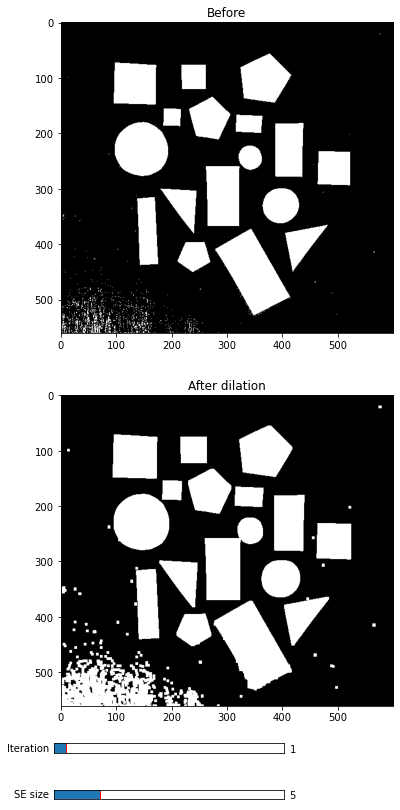

In [8]:
strel = np.ones((5,5),np.uint8)
img1_dilated = cv2.dilate(img1_binary, strel, iterations = 1)

fig = plt.figure(figsize=(8, 13))
plt.subplots_adjust(left=0.0, bottom=0.15)

a=fig.add_subplot(2,1,1)
plt.imshow(img1_binary)
a.set_title('Before')

a=fig.add_subplot(2,1,2)
axdilated = plt.imshow(img1_dilated)
a.set_title('After dilation')

axiter = plt.axes([0.15, 0.1, 0.40, 0.01])
slider_iter = Slider(axiter, 'Iteration', 0, 20, valinit=1, valstep=1)

axstrel = plt.axes([0.15, 0.05, 0.40, 0.01])
slider_strel = Slider(axstrel, 'SE size', 1, 21, valinit=5, valstep=2)

def updateDilationFigure(val):
    itr = slider_iter.val
    strel_size = int(slider_strel.val)
    strel = np.ones((strel_size, strel_size),np.uint8)
    img1_dilated = cv2.dilate(img1_binary, strel, iterations = int(itr))
    axdilated.set_data(img1_dilated)
    # redraw canvas while idle
    fig.canvas.draw_idle()

slider_iter.on_changed(updateDilationFigure);
slider_strel.on_changed(updateDilationFigure);

### Opening
Opening is erosion followed by dilation operation.

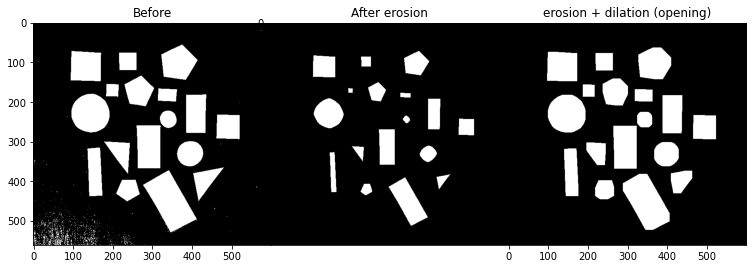

In [9]:
strel = np.ones((20,20),np.uint8)
img1_eroded = cv2.erode(img1_binary, strel,iterations = 1)
img1_eroded_than_dilated = cv2.dilate(img1_eroded, strel,iterations = 1)
fig = plt.figure(figsize=(11, 6))
plt.subplots_adjust(left=0.00, bottom=0.1,hspace=0.0, wspace=0.0)

a=fig.add_subplot(1,3,1)
plt.imshow(img1_binary)
a.set_title('Before')

a=fig.add_subplot(1,3,2)
axeroded = plt.imshow(img1_eroded)
a.set_title('After erosion')

a=fig.add_subplot(1,3,3)
axerodeddilated = plt.imshow(img1_eroded_than_dilated)
a.set_title('erosion + dilation (opening)')

axeroded._axes.set_xticks([]);
axerodeddilated._axes.set_yticks([]);

We can use opening operation: cv2.morphologyEx(img1_binary, cv2.MORPH_OPEN, strel)

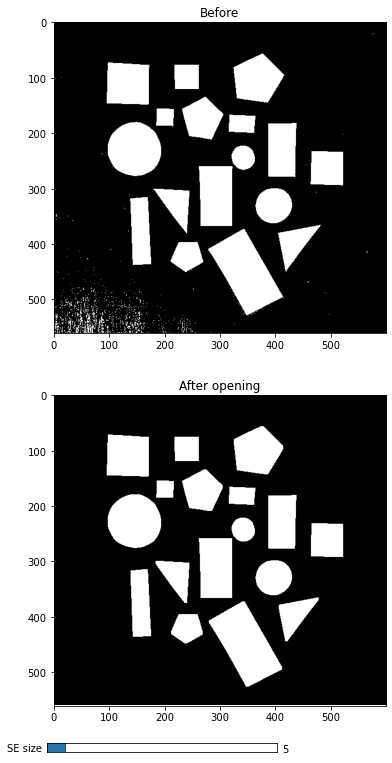

In [10]:
strel = np.ones((5,5),np.uint8)
img1_opened = cv2.morphologyEx(img1_binary, cv2.MORPH_OPEN, strel)

fig = plt.figure(figsize=(8, 13))
plt.subplots_adjust(left=0.0, bottom=0.15)

a=fig.add_subplot(2,1,1)
plt.imshow(img1_binary)
a.set_title('Before')

a=fig.add_subplot(2,1,2)
axopened = plt.imshow(img1_opened)
a.set_title('After opening')

#axiter = plt.axes([0.15, 0.1, 0.40, 0.01])
#slider_iter = Slider(axiter, 'Iteration', 0, 20, valinit=1, valstep=1)

axstrel = plt.axes([0.15, 0.1, 0.40, 0.01])
slider_strel = Slider(axstrel, 'SE size', 1, 51, valinit=5, valstep=2)

def updateBinaryOpeningFigure(val):
    strel_size = int(slider_strel.val)
    strel = np.ones((strel_size, strel_size),np.uint8)
    img1_opened = cv2.morphologyEx(img1_binary, cv2.MORPH_OPEN, strel)
    axopened.set_data(img1_opened)
    # redraw canvas while idle
    fig.canvas.draw_idle()
slider_strel.on_changed(updateBinaryOpeningFigure);

### Closing

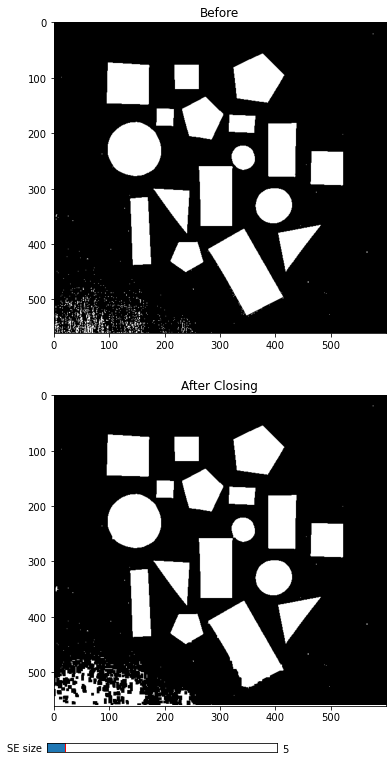

In [11]:
strel = np.ones((5,5),np.uint8)
img1_closed = cv2.morphologyEx(img1_binary, cv2.MORPH_CLOSE, strel)

fig = plt.figure(figsize=(8, 13))
plt.subplots_adjust(left=0.0, bottom=0.15)

a=fig.add_subplot(2,1,1)
plt.imshow(img1_binary)
a.set_title('Before')

a=fig.add_subplot(2,1,2)
axclosed= plt.imshow(img1_closed)
a.set_title('After Closing')

axstrel = plt.axes([0.15, 0.1, 0.40, 0.01])
slider_strel = Slider(axstrel, 'SE size', 1, 51, valinit=5, valstep=2)

def updateClosingFigure(val):
    strel_size = int(slider_strel.val)
    strel = np.ones((strel_size, strel_size),np.uint8)
    img1_closed = cv2.morphologyEx(img1_binary, cv2.MORPH_CLOSE, strel)
    axclosed.set_data(img1_closed)
    # redraw canvas while idle
    fig.canvas.draw_idle()
slider_strel.on_changed(updateClosingFigure);

### Effect of Structuring Element

Opening with Circular SE:

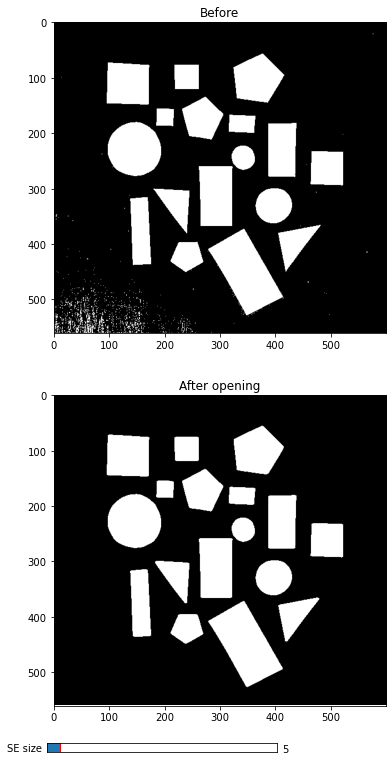

In [12]:
#strel = np.ones((5,5),np.uint8)
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
img1_opened = cv2.morphologyEx(img1_binary, cv2.MORPH_OPEN, strel)

fig = plt.figure(figsize=(8, 13))
plt.subplots_adjust(left=0.0, bottom=0.15)

a=fig.add_subplot(2,1,1)
plt.imshow(img1_binary)
a.set_title('Before')

a=fig.add_subplot(2,1,2)
axopened = plt.imshow(img1_opened)
a.set_title('After opening')

#axiter = plt.axes([0.15, 0.1, 0.40, 0.01])
#slider_iter = Slider(axiter, 'Iteration', 0, 20, valinit=1, valstep=1)

axstrel = plt.axes([0.15, 0.1, 0.40, 0.01])
slider_strel = Slider(axstrel, 'SE size', 1, 71, valinit=5, valstep=2)

def updateOpeningFigureSE(val):
    strel_size = int(slider_strel.val)
    strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(strel_size, strel_size))
    #strel = np.ones((strel_size, strel_size),np.uint8)
    img1_opened = cv2.morphologyEx(img1_binary, cv2.MORPH_OPEN, strel)
    axopened.set_data(img1_opened)
    # redraw canvas while idle
    fig.canvas.draw_idle()
slider_strel.on_changed(updateOpeningFigureSE);

## Grayscale Morphological Operations

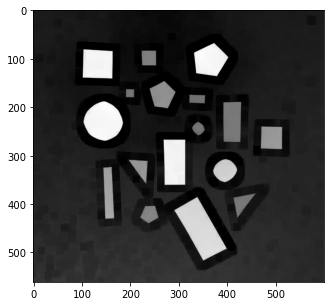

In [13]:
strel = np.ones((15,15),np.uint8)
img1_gray_eroded = cv2.erode(img1, strel,iterations = 1)
fig = plt.figure()
plt.imshow(img1_gray_eroded);

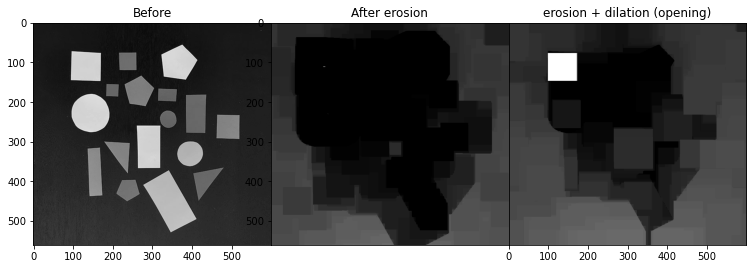

In [14]:
strel = np.ones((70,70),np.uint8)
img1_eroded = cv2.erode(img1, strel,iterations = 1)
img1_eroded_than_dilated = cv2.dilate(img1_eroded, strel,iterations = 1)
fig = plt.figure(figsize=(11, 6))
plt.subplots_adjust(left=0.00, bottom=0.1,hspace=0.0, wspace=0.0)

a=fig.add_subplot(1,3,1)
plt.imshow(img1)
a.set_title('Before')

a=fig.add_subplot(1,3,2)
axeroded = plt.imshow(img1_eroded)
a.set_title('After erosion')

a=fig.add_subplot(1,3,3)
axerodeddilated = plt.imshow(img1_eroded_than_dilated)
a.set_title('erosion + dilation (opening)')

axeroded._axes.set_xticks([]);
axerodeddilated._axes.set_yticks([]);

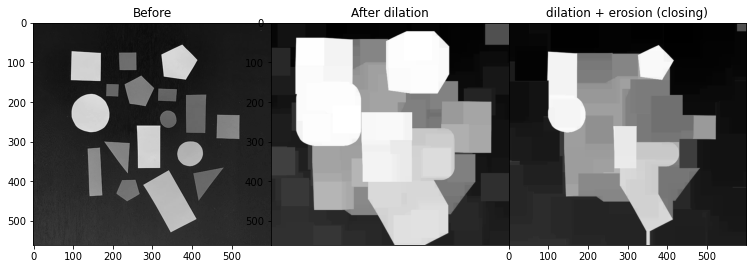

In [15]:
strel = np.ones((70,70),np.uint8)
img1_dilated = cv2.dilate(img1, strel,iterations = 1)
img1_dilated_than_eroded = cv2.erode(img1_dilated, strel,iterations = 1)
fig = plt.figure(figsize=(11, 6))
plt.subplots_adjust(left=0.00, bottom=0.1,hspace=0.0, wspace=0.0)

a=fig.add_subplot(1,3,1)
plt.imshow(img1)
a.set_title('Before')

a=fig.add_subplot(1,3,2)
axeroded = plt.imshow(img1_dilated)
a.set_title('After dilation')

a=fig.add_subplot(1,3,3)
axerodeddilated = plt.imshow(img1_dilated_than_eroded)
a.set_title('dilation + erosion (closing)')

axeroded._axes.set_xticks([]);
axerodeddilated._axes.set_yticks([]);

### Top Hat
It is the difference between an input image and its opening.

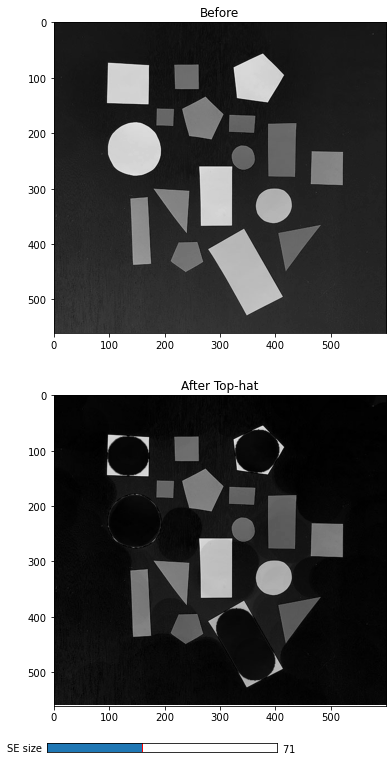

In [16]:
#strel = np.ones((5,5),np.uint8)
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(71,71))
img1_tophat = cv2.morphologyEx(img1, cv2.MORPH_TOPHAT, strel)

fig = plt.figure(figsize=(8, 13))
plt.subplots_adjust(left=0.0, bottom=0.15)

a=fig.add_subplot(2,1,1)
plt.imshow(img1)
a.set_title('Before')

a=fig.add_subplot(2,1,2)
axtophat = plt.imshow(img1_tophat)
a.set_title('After Top-hat')

#axiter = plt.axes([0.15, 0.1, 0.40, 0.01])
#slider_iter = Slider(axiter, 'Iteration', 0, 20, valinit=1, valstep=1)

axstrel = plt.axes([0.15, 0.1, 0.40, 0.01])
slider_strel = Slider(axstrel, 'SE size', 1, 171, valinit=71, valstep=2)

def updateTopHatFigure1(val):
    strel_size = int(slider_strel.val)
    strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(strel_size, strel_size))
    #strel = np.ones((strel_size, strel_size),np.uint8)
    img1_tophat = cv2.morphologyEx(img1, cv2.MORPH_TOPHAT, strel)
    axtophat.set_data(img1_tophat)
    # redraw canvas while idle
    fig.canvas.draw_idle()
slider_strel.on_changed(updateTopHatFigure1);

In [17]:
img2 = cv2.imread('sample_images/rice.tif', cv2.IMREAD_GRAYSCALE)
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(51,51))
img2_tophat = cv2.morphologyEx(img2, cv2.MORPH_TOPHAT, strel)

fig = plt.figure(figsize=(9, 10))
plt.subplots_adjust(left=0.05, bottom=0.15,hspace=0.15, wspace=0.1)

a=fig.add_subplot(2,2,1)
plt.imshow(img2)
a.set_title('Before')

a=fig.add_subplot(2,2,3)
axtophat = plt.imshow(img2_tophat)
a.set_title('After Top-hat')

a=fig.add_subplot(2,2,2)
ret, img2_binary = cv2.threshold(img2,112,255,cv2.THRESH_BINARY)
axthreshold = plt.imshow(img2_binary)
a.set_title('Threshold')

a=fig.add_subplot(2,2,4)
ret, img2_tophatthreshold = cv2.threshold(img2_tophat,49,255,cv2.THRESH_BINARY)
axtophatthreshold = plt.imshow(img2_tophatthreshold)
a.set_title('Threshold After Top-hat')

axstrel = plt.axes([0.15, 0.11, 0.40, 0.01])
slider_strel = Slider(axstrel, 'SE size', 1, 171, valinit=51, valstep=2)
axthresh_slider = plt.axes([0.15, 0.93, 0.40, 0.01])
slider_thresh = Slider(axthresh_slider, 'Threshold', 1, 255, valinit=112, valstep=1)
axthresh_tophat_slider = plt.axes([0.15, 0.07, 0.40, 0.01])
slider_thresh_tophat = Slider(axthresh_tophat_slider, 'Threshold TopHat', 1, 255, valinit=49, valstep=1)

def updateTopHatFigure(val):
    strel_size = int(slider_strel.val)
    strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(strel_size, strel_size))
    img2_tophat = cv2.morphologyEx(img2, cv2.MORPH_TOPHAT, strel)
    
    thresh = int(slider_thresh.val)
    thresh_tophat = int(slider_thresh_tophat.val)
    
    ret, img2_binary = cv2.threshold(img2, thresh,255,cv2.THRESH_BINARY)
    ret, img2_tophatthreshold = cv2.threshold(img2_tophat, thresh_tophat,255,cv2.THRESH_BINARY)
    axtophat.set_data(img2_tophat)
    axtophatthreshold.set_data(img2_tophatthreshold)
    axthreshold.set_data(img2_binary)
    # redraw canvas while idle
    fig.canvas.draw_idle()
slider_strel.on_changed(updateTopHatFigure);
slider_thresh.on_changed(updateTopHatFigure);
slider_thresh_tophat.on_changed(updateTopHatFigure);

error: OpenCV(4.2.0) ../modules/core/src/matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'locateROI'


In [18]:
from skimage.morphology import reconstruction
